### Análisis de componentes
### Introducción a Python
### GitHub repository: https://github.com/jorgemauricio/analisis_componentes
### Instructor: Jorge Mauricio

In [73]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# librerías
from sklearn.ensemble import RandomForestRegressor

# The error metric, In this cas, we will use c-stat (aka ROC/AUC)
from sklearn.metrics import roc_auc_score

# an efficient data structure
import pandas as pd

%matplotlib inline

In [74]:
# leer csv
df = pd.read_csv("data/PAPAYA_BROMATOLOGICOS.csv")

In [75]:
# estructura del csv
df.head()

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [76]:
df.MUESTRA.unique()

array(['PaSAC50', 'PaSAC80', 'PaLIO50', 'PaLIO80'], dtype=object)

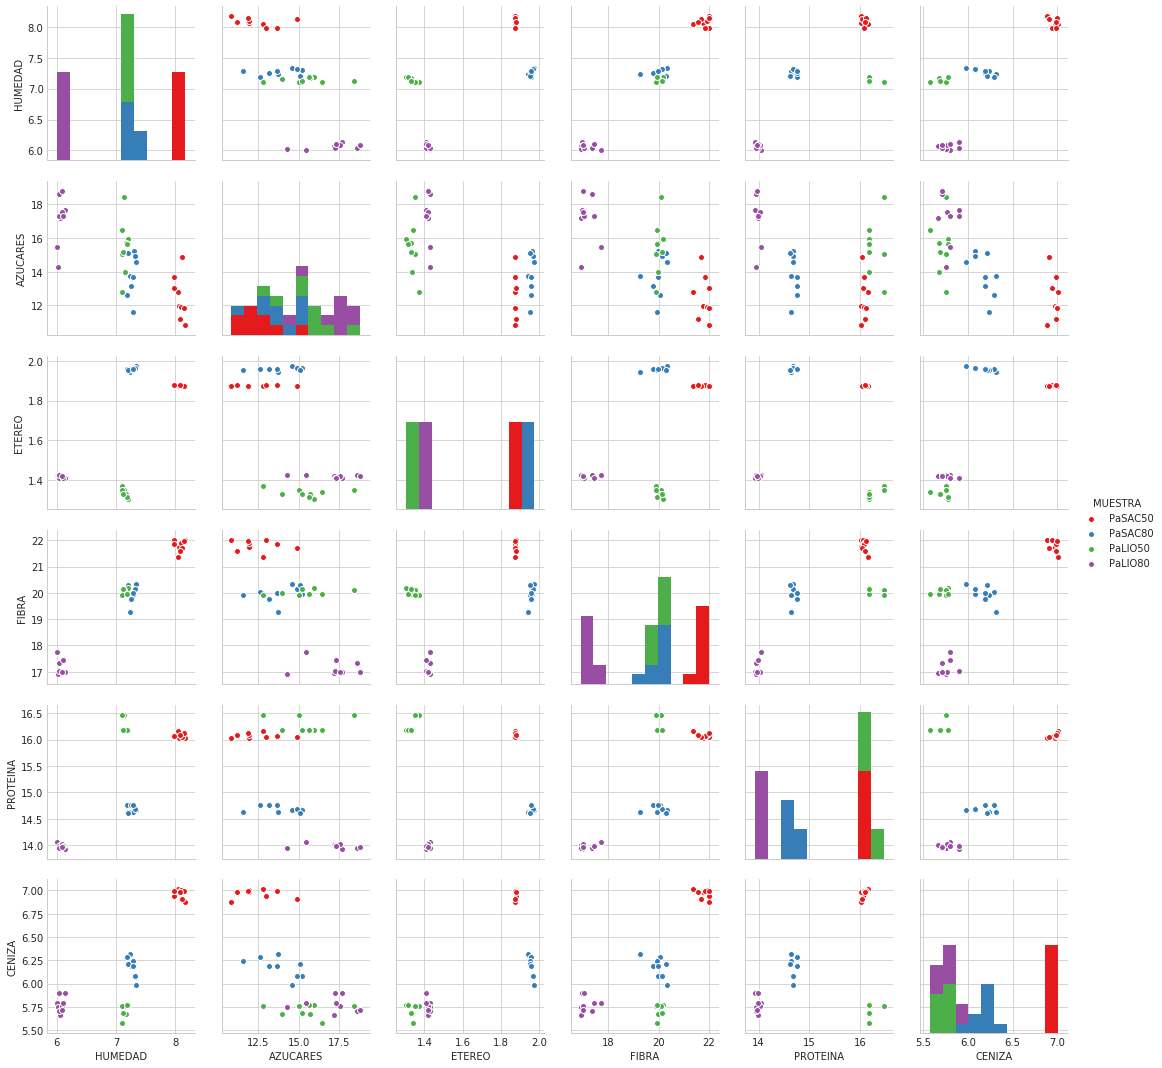

In [77]:
# EDA (Exploratory Data Analysis) correlación entre variables
sns.pairplot(df,hue='MUESTRA',palette='Set1')

In [78]:
# dividir los datos en entrenamiento y prueba para evitar que el modelo se sobrealimente
# Train Test Split
from sklearn.model_selection import train_test_split
X = df.drop('MUESTRA',axis=1)
y = df['MUESTRA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [79]:
# UTILIZAMOS UN ARBOL DE DECISIONES PARA DETERMINAR COMO ES QUE SE CLASIFICAN LOS COMPUESTOS DE ACUERDO
# A SUS CUALIDADES
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
# prediction and evaluation
predictions = dtree.predict(X_test)

In [81]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         4
    PaLIO80       1.00      1.00      1.00         2
    PaSAC50       1.00      1.00      1.00         2
    PaSAC80       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        11



In [82]:
print(confusion_matrix(y_test,predictions))

[[4 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [83]:
# Tree Visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['HUMEDAD', 'AZUCARES', 'ETEREO', 'FIBRA', 'PROTEINA', 'CENIZA']

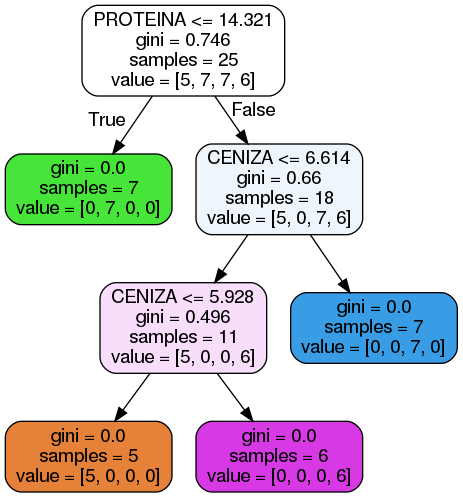

In [84]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

In [85]:
# random forests
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [86]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[4 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [87]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

    PaLIO50       1.00      1.00      1.00         4
    PaLIO80       1.00      1.00      1.00         2
    PaSAC50       1.00      1.00      1.00         2
    PaSAC80       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        11



In [88]:
# PCA
from sklearn.preprocessing import StandardScaler

In [89]:
X = df.drop("MUESTRA", axis=1)

In [90]:
from sklearn.preprocessing import StandardScaler

In [91]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [92]:
scaled_data = scaler.transform(X)

In [93]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [94]:
x_pca = pca.transform(scaled_data)

In [95]:
scaled_data.shape

(36, 6)

In [96]:
x_pca.shape

(36, 2)

In [97]:
X.head()

,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [98]:
def generar_indice(elemento):
    if elemento == "PaSAC50":
        return 1
    if elemento == "PaSAC80":
        return 2
    if elemento == "PaLIO50":
        return 3
    if elemento == "PaLIO80":
        return 4

In [99]:
y_dummies = list(map(generar_indice,y))

Text(0,0.5,'Second Principal Component')

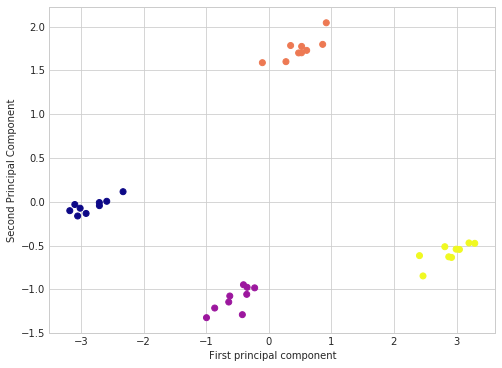

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=y_dummies,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [101]:
# interpreting the components
pca.components_

array([[-0.47127516,  0.413324  , -0.34569398, -0.46058078, -0.31511255,
        -0.41967616],
       [ 0.13324879,  0.14738688, -0.60036773,  0.21187538,  0.69628881,
        -0.26527565]])

In [102]:
df_comp = pd.DataFrame(pca.components_,columns=X.columns)

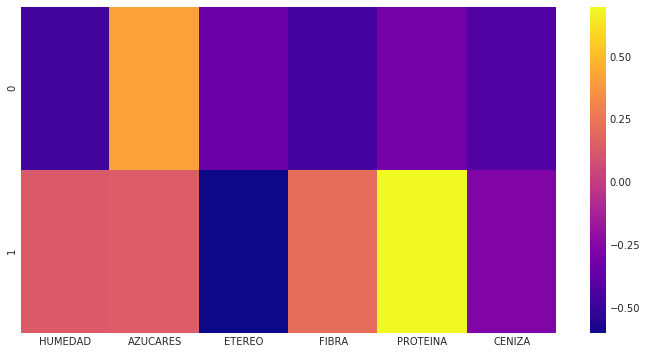

In [103]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [104]:
# K Nearest Neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_data,y_dummies,
                                                    test_size=0.30)

In [105]:
# using KNN

In [106]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [107]:
pred = knn.predict(X_test)

In [108]:
from sklearn.metrics import classification_report,confusion_matrix

In [109]:
print(confusion_matrix(y_test,pred))

[[2 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 3]]


In [110]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        11



In [111]:
# choosing a K Value
error_rate = []

# Will take some time
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

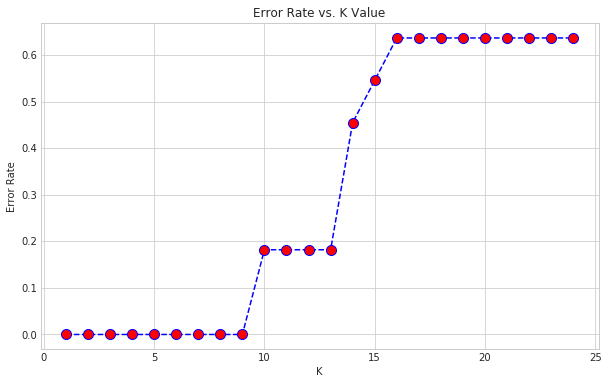

In [112]:
plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [113]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[2 0 0 0]
 [0 4 0 0]
 [0 0 2 0]
 [0 0 0 3]]


             precision    recall  f1-score   support

          1       1.00      1.00      1.00         2
          2       1.00      1.00      1.00         4
          3       1.00      1.00      1.00         2
          4       1.00      1.00      1.00         3

avg / total       1.00      1.00      1.00        11



In [114]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[2 0 0 0]
 [4 0 0 0]
 [0 0 2 0]
 [0 0 3 0]]


             precision    recall  f1-score   support

          1       0.33      1.00      0.50         2
          2       0.00      0.00      0.00         4
          3       0.40      1.00      0.57         2
          4       0.00      0.00      0.00         3

avg / total       0.13      0.36      0.19        11



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# EDA

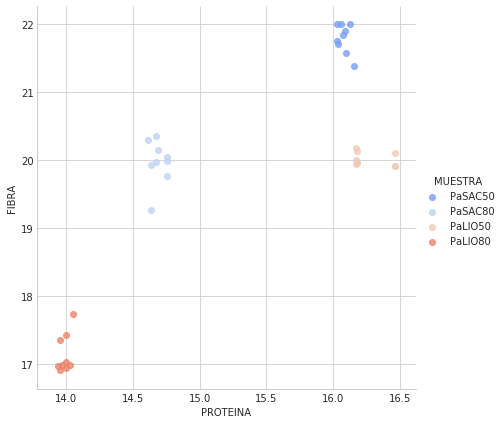

In [115]:
sns.set_style('whitegrid')
sns.lmplot('PROTEINA','FIBRA',data=df, hue='MUESTRA',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [116]:
from sklearn.cluster import KMeans

In [117]:
kmeans = KMeans(n_clusters=6)

In [118]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [119]:
kmeans.cluster_centers_

array([[ 7.45651666, 14.94913392,  1.94696512, 20.49494232, 14.9378    ,
         6.25374435],
       [ 6.07856045, 17.77633594,  1.4164202 , 17.10375514, 13.98142857,
         5.77634162],
       [ 8.07315386, 12.15056174,  1.87576354, 21.80375922, 16.082     ,
         6.97272641],
       [ 7.14562729, 16.07458751,  1.32993584, 20.02666731, 16.26121429,
         5.71186773],
       [ 7.21768532, 13.08228626,  1.78203914, 19.8458573 , 15.16721429,
         6.0917681 ],
       [ 6.01063085, 14.87663649,  1.42753047, 17.32404014, 14.004     ,
         5.77422935]])

In [120]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 3, 3, 3,
       4, 3, 3, 3, 3, 5, 1, 1, 5, 1, 1, 1, 1, 1], dtype=int32)

In [121]:
df.head()

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996


In [53]:
def generar_indice(elemento):
    if elemento == "PiLIO50":
        return 1
    if elemento == "PiLIO60":
        return 2
    if elemento == "PiLIO80":
        return 3
    if elemento == "PiSAC50":
        return 4
    if elemento == "PiSAC60":
        return 5
    if elemento == "PiSAC80":
        return 6

In [122]:
df['Cluster'] = df['MUESTRA'].apply(generar_indice)
df.head(10)

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA,Cluster
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.030,6.879787,1
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.156,7.010996,1
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.056,6.940326,1
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.030,6.979787,1
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.086,7.000996,1
5,PaSAC50,7.983207,13.662424,1.876934,21.843508,16.076,6.990326,1
6,PaSAC50,8.121828,14.887668,1.875403,21.701089,16.040,6.909787,1
7,PaSAC50,8.147318,11.850996,1.875500,21.991089,16.126,6.996335,1
8,PaSAC50,8.083207,11.167006,1.877934,21.574351,16.096,6.983259,1
9,PaSAC80,7.334711,14.590271,1.976403,20.350833,14.675,5.981738,2


In [123]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[0 0 0 0 0 0]
 [1 0 8 0 0 0]
 [4 0 0 0 5 0]
 [0 0 0 7 2 0]
 [0 7 0 0 0 2]
 [0 0 0 0 0 0]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00         0
          1       0.00      0.00      0.00         9
          2       0.00      0.00      0.00         9
          3       1.00      0.78      0.88         9
          4       0.00      0.00      0.00         9
          5       0.00      0.00      0.00         0

avg / total       0.25      0.19      0.22        36



/home/jorge/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [154]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [155]:
scaled_data = preprocessing.scale(X.T)
 
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 

In [156]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [136]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 


In [158]:
per_var

array([96.8,  3.1,  0.1,  0. ,  0. ,  0. ])

In [159]:
labels

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

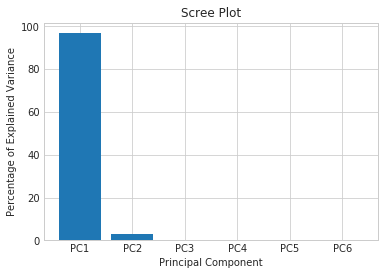

In [137]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [182]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(scaled_data, index=df["MUESTRA"], columns=labels)

ValueError: Shape of passed values is (36, 6), indices imply (6, 36)

In [161]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

ValueError: cannot convert float NaN to integer

<Figure size 432x288 with 1 Axes>

In [150]:
X.columns.values

array(['HUMEDAD', 'AZUCARES', 'ETEREO', 'FIBRA', 'PROTEINA', 'CENIZA'],
      dtype=object)

In [65]:
genes = ['gene' + str(i) for i in range(1,101)]
 
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
 
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
 
for gene in data.index:
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,1000), size=5)
 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  675  613  669  664  653  457  460  455  452  460
gene2  803  743  773  764  766  958  932  951  931  935
gene3  542  517  525  516  535  114  116   93   99  110
gene4  153  140  133  124  138  772  788  760  750  776
gene5  678  681  645  655  671   42   56   48   50   38
(100, 10)


In [66]:
scaled_data = preprocessing.scale(data.T)

In [68]:
scaled_data

array([[ 1.18902166, -0.60296524,  1.07022474, -0.95061083,  1.0381356 ,
         1.38923218, -0.8999574 ,  1.05269942,  1.05570394,  1.0510234 ,
        -1.05058812, -0.96763465,  0.94757575, -0.98448158, -0.98954699,
         1.03473662, -0.79721833,  1.0108197 , -0.54255417, -1.3080967 ,
        -0.96754479,  0.99758683, -0.95400049, -1.2832722 , -0.96185491,
         1.00686687,  0.53757439,  1.00541014,  0.95471574,  1.33747484,
        -1.00981758,  1.17770514, -1.11072841,  0.982065  , -1.02090991,
        -1.02090558,  0.6281501 ,  1.0211297 , -1.01202348, -0.98402526,
         0.93162402, -0.68439835, -1.71851069,  0.61719755, -0.95082809,
         0.74595357, -0.93630247,  1.10851503,  1.12026475, -1.00957697,
        -0.72384684,  1.01246956,  0.96989891,  0.74471014,  1.09693333,
         1.17475642, -1.05844156, -0.94040494,  1.00718242, -1.03411659,
        -0.93337813, -1.00767547,  0.99201709,  0.6927769 ,  0.8515828 ,
        -0.42837419,  1.09205086,  1.06781202, -0.5

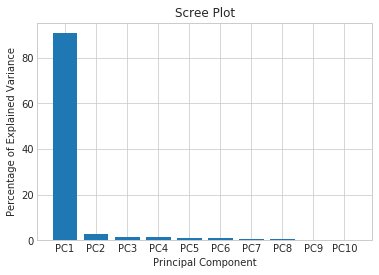

In [69]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

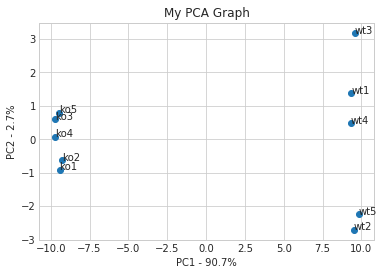

In [70]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [169]:
df

,MUESTRA,HUMEDAD,AZUCARES,ETEREO,FIBRA,PROTEINA,CENIZA,Cluster
0,PaSAC50,8.171828,10.844601,1.875403,22.001089,16.0300,6.879787,1
1,PaSAC50,8.047318,12.782585,1.872500,21.374351,16.1560,7.010996,1
2,PaSAC50,7.983207,13.015447,1.877934,22.001089,16.0560,6.940326,1
3,PaSAC50,8.071828,11.947515,1.876403,21.743508,16.0300,6.979787,1
4,PaSAC50,8.097318,11.933919,1.873500,21.901089,16.0860,7.000996,1
5,PaSAC50,7.983207,13.662424,1.876934,21.843508,16.0760,6.990326,1
6,PaSAC50,8.121828,14.887668,1.875403,21.701089,16.0400,6.909787,1
7,PaSAC50,8.147318,11.850996,1.875500,21.991089,16.1260,6.996335,1
8,PaSAC50,8.083207,11.167006,1.877934,21.574351,16.0960,6.983259,1
9,PaSAC80,7.334711,14.590271,1.976403,20.350833,14.6750,5.981738,2
